# Task 2 - False Color Image 

Date: 2024-11-23

Author: Jordan Sibley 

[Github Repository](https://github.com/jordancsibley/eds220-hwk4)

## Data

The data used to create the false color image of the Thomas fire is Landsat data and fire perimeter data. The Landsat Collection 2 Level-2 data is a simplifed collection of bands collected from the an atmosphereic satellite. The fire perimeter data is a subset of a CAL FIRE geodatabase that contains only the geometries for the Thomas Fire. 

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np
import geopandas as gpd 
import os 
import rioxarray as rioxr
import xarray as xr
import matplotlib.pyplot as plt

# Set environment variable
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

ASK IF I SHOULD BE PUTTING LANDSAT DATA IN THE DATA FOLDER OR NOT

In [2]:
# File path to data on workbench 
fp = os.path.join("/courses/EDS220/data/hwk4_landsat_data/landsat8-2018-01-26-sb-simplified.nc")
landsat = rioxr.open_rasterio(fp)

In [3]:
# Explore landsat data 
landsat 

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

In [9]:
# View data elements 
print('Height: ', landsat.rio.height)
print('Width: ', landsat.rio.width)
print('Spatial bounding box:')
print(landsat.rio.bounds(), '\n')
print('CRS: ', landsat.rio.crs)

Height:  731
Width:  870
Spatial bounding box:
(121170.0, 3755160.0, 356070.0, 3952530.0) 

CRS:  PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


ERROR 1: PROJ: proj_identify: /opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [11]:
# Original dimensions
print('Size of dimensions: ', dict(landsat.sizes))

Size of dimensions:  {'band': 1, 'x': 870, 'y': 731}


The landsat data is an xarray that contains the band information. The dimensions are x and y and also band that just contains the interger 1.  The data variables of the xarray are the band types which are red, green, blue, near infrared (nir08), and the shortwave infrared (swir22). 

In [12]:
# Drop the `band` dimension of the data and remove dims of length 1 
landsat = landsat.squeeze().drop_vars('band')

# View altered landsat data 
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

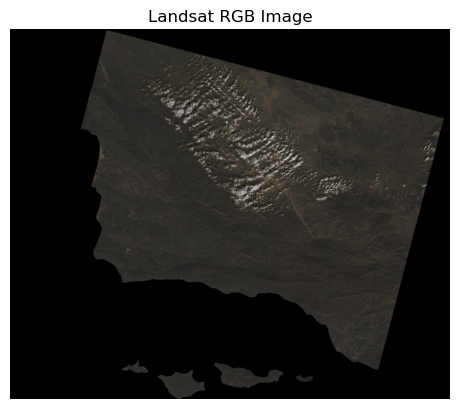

In [23]:
# This works, but I don't think this is what they want 


rgb = landsat[['red', 'green', 'blue']].to_array().values

# Move bands to the last dimension
rgb = np.moveaxis(rgb, 0, -1)  # Rearrange (variable, y, x) -> (y, x, variable)

# Adjust the scale 
rgb = rgb / np.max(rgb)


# Plot the RGB image
plt.imshow(rgb)  # No transpose needed now
plt.title("Landsat RGB Image")
plt.axis('off')
plt.show()

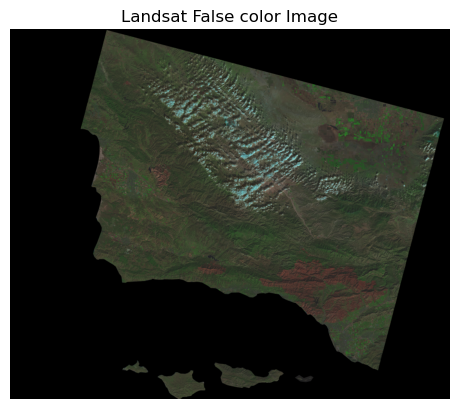

In [25]:
falseimage = landsat[['swir22', 'nir08', 'red']].to_array().values

# Move bands to the last dimension
falseimage = np.moveaxis(falseimage, 0, -1)  # Rearrange (variable, y, x) -> (y, x, variable)

# Adjust the scale 
falseimage = falseimage / np.max(falseimage)


# Plot the RGB image
plt.imshow(falseimage)  # No transpose needed now
plt.title("Landsat False color Image")
plt.axis('off')
plt.show()

In [31]:
# Convert numpy array to xarray 
falseimage_array = xr.DataArray(falseimage)

# Convert DataArray to an xarray DataArray
#falseimage_rio = falseimage_array.rio.write_crs("EPSG:6326")

falseimage_array

<xarray.DataArray (dim_0: 731, dim_1: 870, dim_2: 3)> Size: 15MB
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])
Dimensions without coordinates: dim_0, dim_1, dim_2